In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [2]:
custom_palette = sns.color_palette(['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8'])

In [3]:
distance_df = pd.read_csv('./data/metabolite_distance.csv')
distance_df

,specie,metabolite1,smiles1,metabolite2,smiles2,metabolic distance,tanimoto distance,cFP edit distance,bFP edit distance,mordred distance,POM distance
0,ORG-5993,INDOLEYL-CPD,N#CCc1c[nH]c2ccccc12,INDOLE_ACETATE_AUXIN,O=C([O-])Cc1c[nH]c2ccccc12,1,0.500000,30.0,134.0,0.304507,0.381891
1,ORG-5993,CPD1F-136,C=C1C[C@]23C[C@H]1CC[C@H]2[C@]1(C)CCC[C@@](C)(...,CPD1F-128,C=C1C[C@@]23CC[C@@H]4C(C)(C)CCC[C@@]4(C)[C@@H]...,4,0.571429,74.0,262.0,0.452353,0.802295
2,ORG-5993,CPD1F-136,C=C1C[C@]23C[C@H]1CC[C@H]2[C@]1(C)CCC[C@@](C)(...,CPD1F-137,C=C1C[C@]23C[C@H]1CC[C@@H]2[C@@]12CC[C@H](O)[C...,6,0.560606,92.0,312.0,0.773418,0.727556
3,ORG-5993,CPD1F-136,C=C1C[C@]23C[C@H]1CC[C@H]2[C@]1(C)CCC[C@@](C)(...,CPD-638,C=C1C[C@]23C[C@@]1(O)CC[C@@H]2[C@@]12CCC[C@](C...,4,0.708333,101.0,224.0,0.529844,0.650542
4,ORG-5993,CPD1F-136,C=C1C[C@]23C[C@H]1CC[C@H]2[C@]1(C)CCC[C@@](C)(...,CPD-12332,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,7,0.614286,96.0,320.0,0.663718,0.671158
...,...,...,...,...,...,...,...,...,...,...,...
400,TAX-9606,NICOTINE,C[NH+]1CCC[C@H]1c1cccnc1,CPD-3186,C[N+]1=CCC[C@H]1c1cccnc1,1,0.571429,38.0,246.0,0.193858,0.016107
401,TAX-9606,NICOTINE,C[NH+]1CCC[C@H]1c1cccnc1,CPD-2748,c1cncc([C@@H]2CCC[NH2+]2)c1,1,0.538462,34.0,78.0,0.409066,0.047430
402,TAX-9606,NICOTINE,C[NH+]1CCC[C@H]1c1cccnc1,CPD-2749,O=C1CC[C@@H](c2cccnc2)N1,2,0.595238,40.0,160.0,0.302529,0.203067
403,TAX-9606,NICOTINE,C[NH+]1CCC[C@H]1c1cccnc1,CPD-2743,C[N+]1([O-])CCC[C@H]1c1cccnc1,1,0.558140,36.0,136.0,0.576718,0.061678


# Figure 2

In [4]:
def _get_resampled_distance_df(distance_df, resample_key, number_of_resample=10, random_state=3):
    n_sample_per_bin = [len(df) for _, df in distance_df.groupby(resample_key)]
    resampled_distance_df = [df.sample(n=number_of_resample, replace=True, random_state=random_state) for df_idx, df in distance_df.groupby(resample_key)]
    resampled_distance_df = pd.concat(resampled_distance_df)
    return resampled_distance_df

def _draw_corr(x, y, distance_df, color="seagreen"):
    boxplot_alpha = 0.2
    sns.boxplot(
        x=x,
        y=y,
        data=distance_df,
        color="gray",
        boxprops=dict(alpha=boxplot_alpha),
        capprops=dict(alpha=boxplot_alpha),
        whiskerprops=dict(alpha=boxplot_alpha),
        medianprops=dict(alpha=boxplot_alpha),
        showfliers=False,
    )
    sns.stripplot(x=x, y=y, data=distance_df, alpha=0.5, color=color)
    y_data = distance_df[y]
    x_data = distance_df[x] - 1
    sns.regplot(x=x_data, y=y_data, color=color, scatter=False)
    r, p = scipy.stats.pearsonr(distance_df[x], distance_df[y])
    title = f"{y}\nR={r:.2f}, p={p:.2e}"
    plt.title(title, fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)

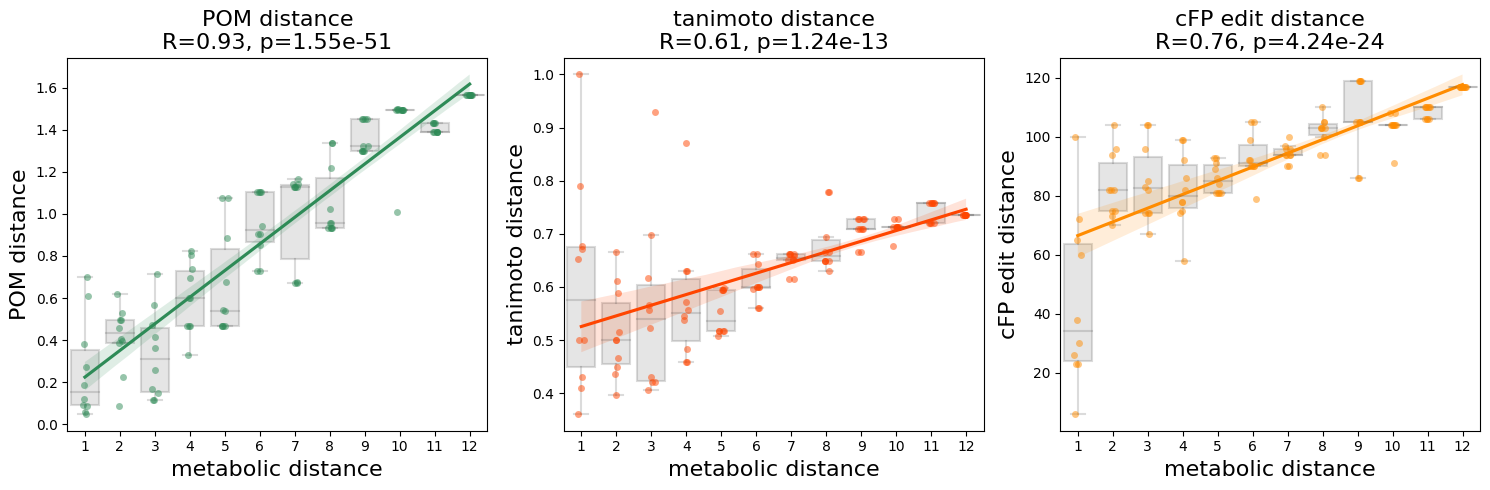

In [5]:
resampled_distance_df = _get_resampled_distance_df(distance_df, resample_key="metabolic distance", random_state=3)

plt.figure(figsize=(15, 5), dpi=100)

plt.subplot(1, 3, 1)
_draw_corr("metabolic distance", "POM distance", resampled_distance_df, color='seagreen')

plt.subplot(1, 3, 2)
_draw_corr("metabolic distance", "tanimoto distance", resampled_distance_df, color="orangered")

plt.subplot(1, 3, 3)
_draw_corr("metabolic distance", "cFP edit distance", resampled_distance_df, color="darkorange")

plt.tight_layout()
plt.show()

# Extended Data Figure 5

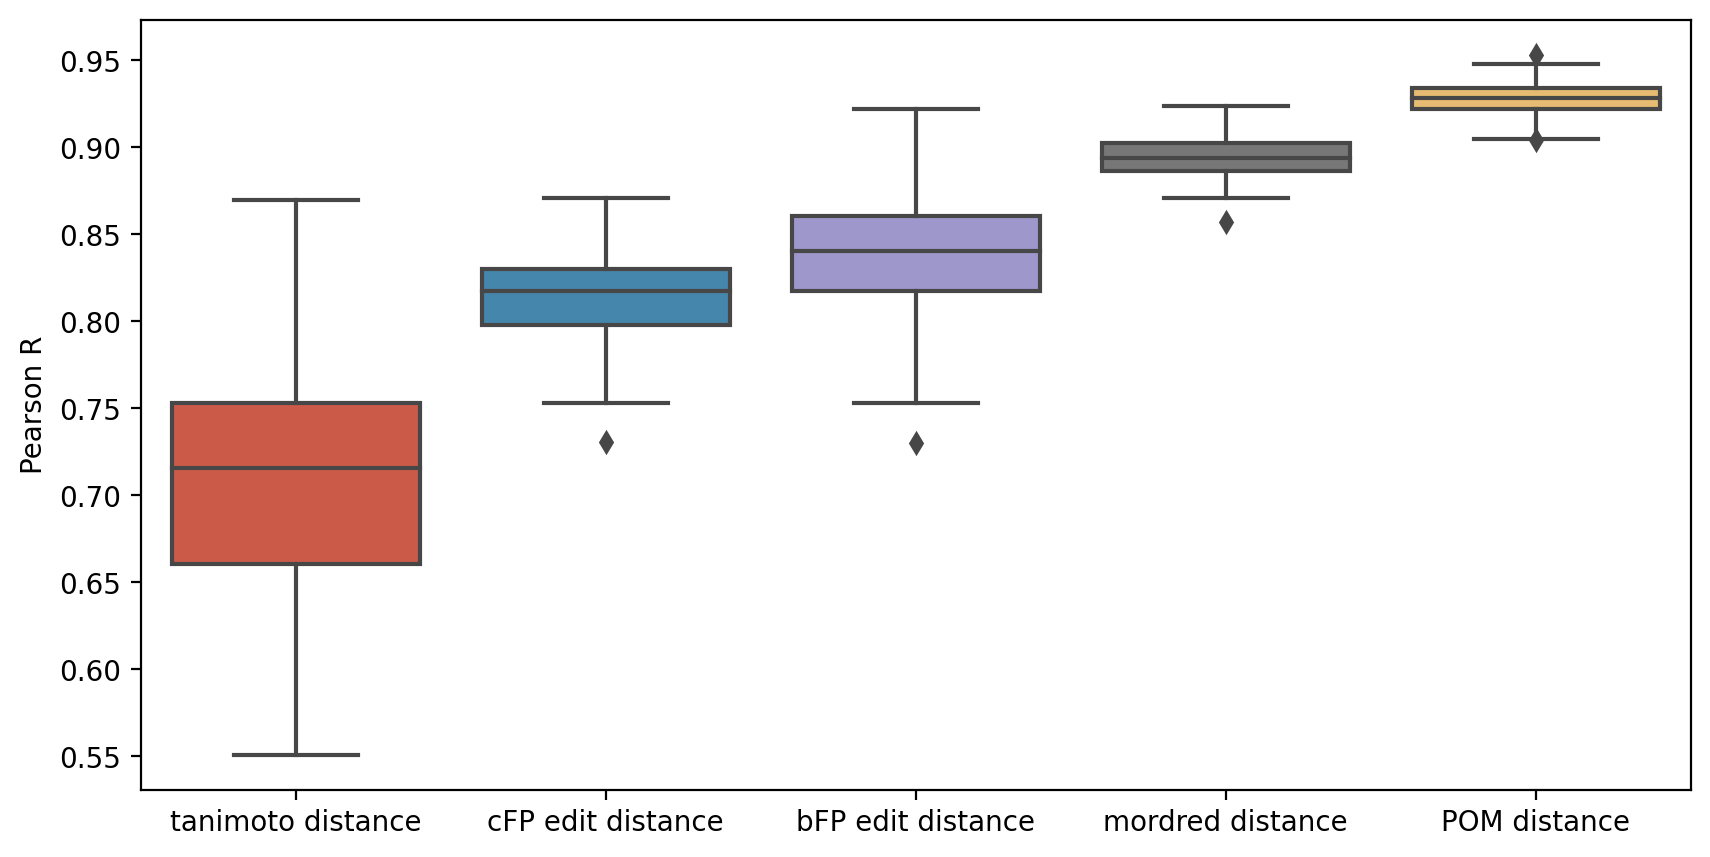

In [6]:
def _get_r(x, y, distance_df, color="seagreen"):
    r, p = scipy.stats.pearsonr(distance_df[x], distance_df[y])
    return r


result = []
for seed in np.arange(100):
    resampled_distance_df = _get_resampled_distance_df(distance_df, resample_key="metabolic distance", random_state=seed)
    for metric in ["tanimoto distance", "cFP edit distance", "bFP edit distance", "mordred distance", "POM distance"]:
        result.append(
            {
                "R": _get_r("metabolic distance", metric, resampled_distance_df),
                "metric": metric,
                "seed": seed,
            }
        )
result_df = pd.DataFrame(result)
plt.figure(figsize=(10, 5), dpi=200)
sns.boxplot(data=result_df, x="metric", y="R", palette=custom_palette)
plt.xlabel('')
plt.ylabel('Pearson R')
plt.show()

# Extended Data Figure 9

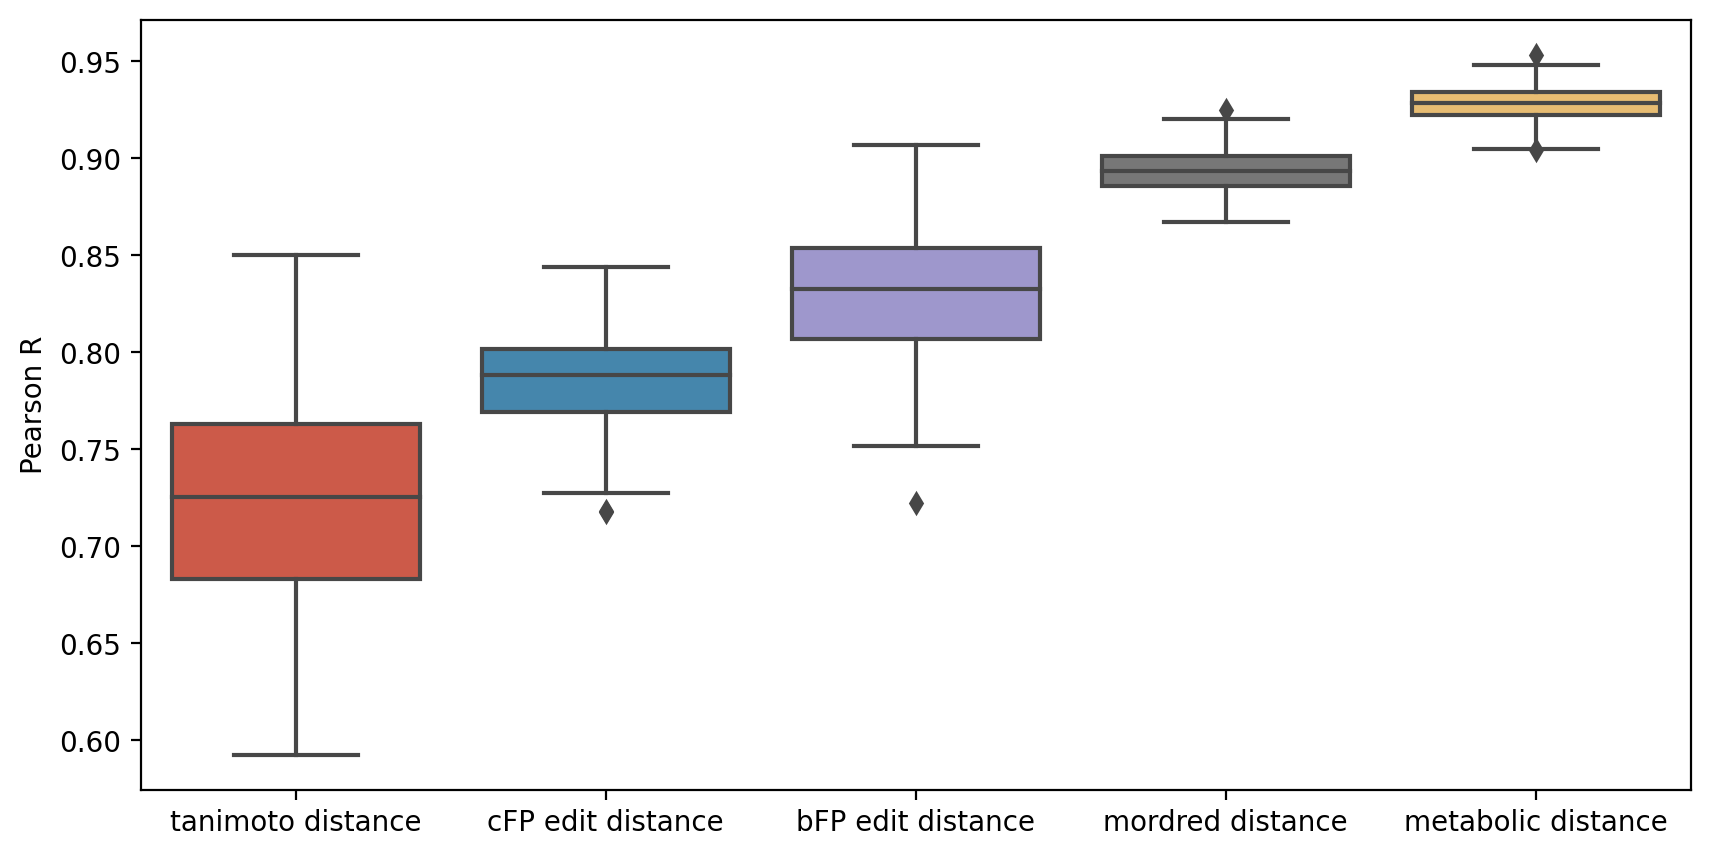

In [7]:
result = []
for seed in np.arange(100):
    resampled_distance_df = _get_resampled_distance_df(distance_df, resample_key="metabolic distance", random_state=seed)
    for metric in ["tanimoto distance", "cFP edit distance", "bFP edit distance", "mordred distance", "metabolic distance"]:
        result.append(
            {
                "R": _get_r("POM distance", metric, resampled_distance_df),
                "metric": metric,
                "seed": seed,
            }
        )
result_df = pd.DataFrame(result)
plt.figure(figsize=(10, 5), dpi=200)
sns.boxplot(data=result_df, x="metric", y="R", palette=custom_palette)
plt.xlabel('')
plt.ylabel('Pearson R')
plt.show()

# Extended Data Figure 10

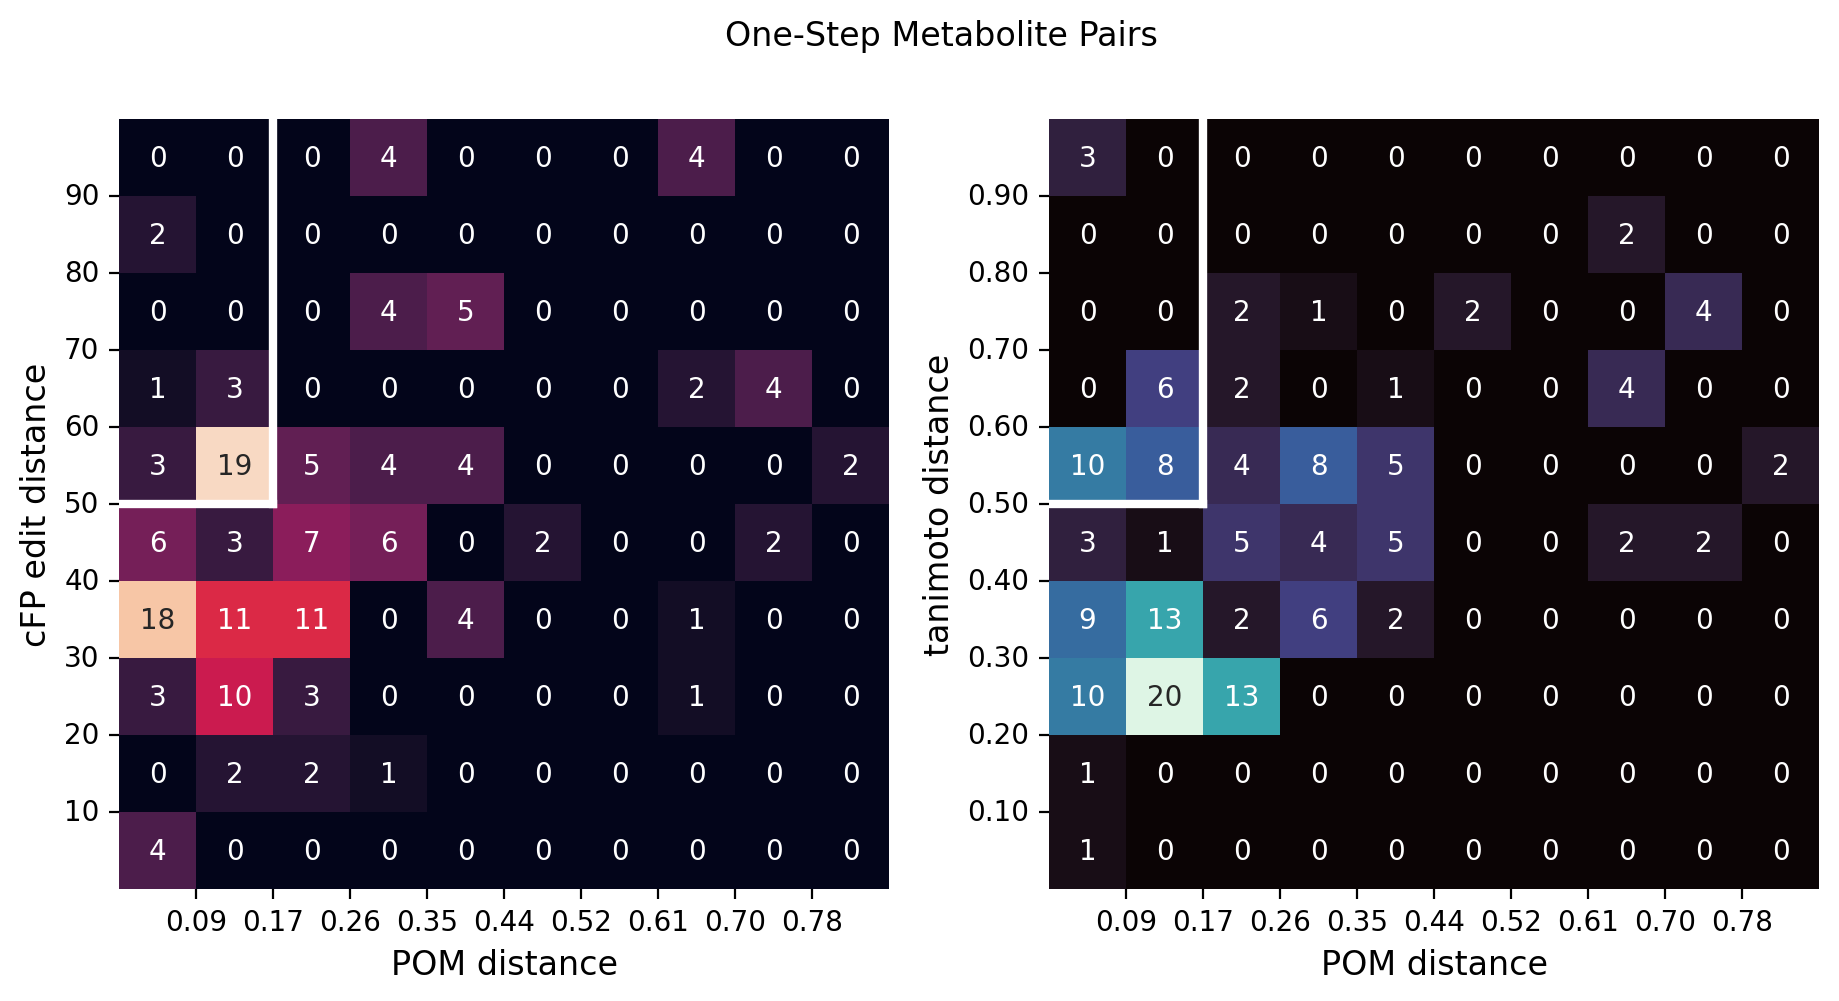

In [8]:
viz_df = distance_df[distance_df['metabolic distance']==1]
n_bins = 10
fontsize = 12
box_lw = 3

fig = plt.figure(figsize=(11, 5), dpi=200)
plt.subplot(1,2,1)
x, y = 'POM distance', 'cFP edit distance'
data, x_ticks, y_ticks = np.histogram2d(viz_df[x], viz_df[y], bins=n_bins)
ax = sns.heatmap(data.T[::-1], square=True, annot=True, cbar=None, vmin=0, vmax=20, cmap='rocket')
plt.plot((0, 2), (5,5), lw=box_lw, color='white')
plt.plot((2, 2), (0,5), lw=box_lw, color='white')
plt.xticks(np.arange(n_bins+1)[1:-1], [f'{v:.2f}' for v in x_ticks][1:-1])
plt.yticks(np.arange(n_bins+1)[::-1][1:-1], [int(v) for v in y_ticks][1:-1], rotation=0)
plt.xlabel(x, fontsize=fontsize)
plt.ylabel(y, fontsize=fontsize)
plt.subplot(1,2,2)
x, y = 'POM distance', 'tanimoto distance'
data, x_ticks, y_ticks = np.histogram2d(viz_df[x], viz_df[y], bins=n_bins)
ax = sns.heatmap(data.T[::-1], square=True, annot=True, cbar=None, vmin=0, vmax=20, cmap='mako')
plt.plot((0, 2), (5,5), lw=box_lw, color='white')
plt.plot((2, 2), (0,5), lw=box_lw, color='white')
plt.xticks(np.arange(n_bins+1)[1:-1], [f'{v:.2f}' for v in x_ticks][1:-1])
plt.yticks(np.arange(n_bins+1)[::-1][1:-1], [f'{v:.2f}' for v in y_ticks][1:-1], rotation=0)
plt.xlabel(x, fontsize=fontsize)
plt.ylabel(y, fontsize=fontsize)
fig.suptitle('One-Step Metabolite Pairs')
plt.show()